In [3]:
import os as os
import sys

# adding folders to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd()  , '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

akshat_lisa_root = os.path.abspath(os.path.join(os.getcwd()  , '..',))
if akshat_lisa_root not in sys.path:
    sys.path.insert(0, akshat_lisa_root)

from scripts.psdNoiseHistogram import plot_psd_noise_histogram
import matplotlib.pyplot as plt

Sampling PSD at 0.080 Hz (closest to requested 0.080 Hz)


NameError: name 'actual_freq' is not defined

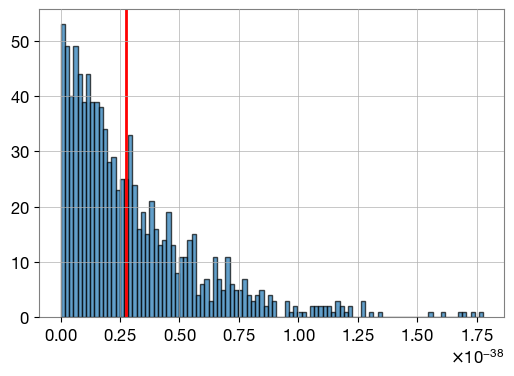

In [7]:
bethLISA_directory = os.path.join(os.getcwd(), "..", "..", "bethLISA")
tdi_path = os.path.join(bethLISA_directory, 'lisa_glitch_simulation',
                        'tdi_outputs', 'small_glitch_tdi.h5')

# pick the frequency you're interested in, e.g. 10 Hz
n_trials = 1000
psd_orig, noise_vals, idx = plot_psd_noise_histogram(
    tdi_file_path = tdi_path,
    channel       = "X",
    target_freq   = 80e-3,
    n_trials      = n_trials,
    window        = "hann",
    nper          = 4096,
    noverlap      = None,
    average       = "mean",
    scaling       = "density"
)

# 4) plot histogram
plt.figure(figsize=(6,4))
plt.hist(noise_vals, bins=100, alpha=0.7, edgecolor='k')
# overlay the original PSD value
plt.axvline(psd_orig[idx], color='r', lw=2, label="Original PSD")
plt.xlabel(f"PSD @ {actual_freq:.3f} Hz [1/Hz]")
plt.ylabel("Count")
plt.title(f"Distribution of {n_trials} Noise‐PSD Realizations")
plt.legend()
plt.tight_layout()
plt.show()